# Image Processing Lab №4
Highlighting contours in an image

## Data Loading

In [1]:
import os
import numpy as np
from PIL import Image
from IPython.display import display

from pathlib import Path

In [3]:
def open_image(image_name=None, images_dir=None):
    if images_dir:
        image_list = []
        for path in images_dir.iterdir():
            image = Image.open(path)
            image_list.append(image)
        return image_list

    image_folder = Path('input/'+image_name)
    try:
        image = Image.open(image_folder)
    except FileNotFoundError:
        print(f'Image file not found: {image_folder}')
    
    return image

pth = Path('input/')

In [106]:
def display_image(img):
    display(Image.fromarray(img))

In [128]:
def save_image(path: str, img: np.array):
    Image.fromarray(img).save(path)

In [4]:
img = open_image(image_name='input.png')

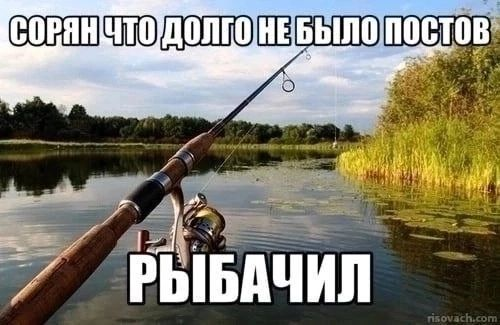

In [5]:
img

## Convert to grayscale

In [31]:
def convert_to_grayscale(img: np.array):
    grayscaled_img = np.mean(img, axis=2)
    return grayscaled_img[:, :, np.newaxis]

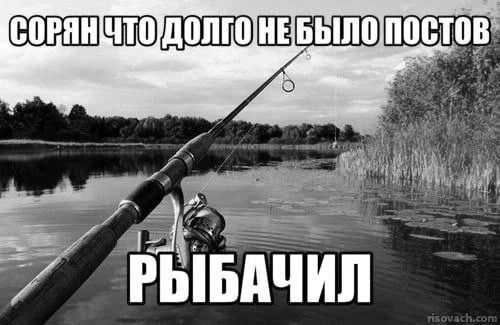

In [107]:
img_gs = np.squeeze(convert_to_grayscale(np.array(img)), axis=2).astype(np.uint8)

display_image(img_gs)

## Gradients

Scharr operator

In [38]:
Gx = np.array([[3, 0, -3],
               [10, 0, -10],
               [3, 0, -3]])

Gy = np.array([[3, 10, 3],
               [0, 0, 0],
               [-3, -10, -3]])

In [62]:
def convolve2D(image, kernel, padding=0, strides=1):
    kernel = np.flipud(np.fliplr(kernel))

    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
    else:
        imagePadded = image

    for y in range(0, image.shape[1], strides):
        if y > image.shape[1] - yKernShape:
            break
        for x in range(0, image.shape[0], strides):
            if x > image.shape[0] - xKernShape:
                break
            output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()

    return output

In [91]:
def MinMaxScaler(img, new_min=0, new_max=255):
    result = np.zeros_like(img)

    min_vals = np.min(img, axis=0)
    max_vals = np.max(img, axis=0)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if max_vals[j] - min_vals[j] != 0:
                result[i, j] = ((img[i, j] - min_vals[j]) / (max_vals[j] - min_vals[j])) * (new_max - new_min) + new_min
            else:
                result[i, j] = new_min
    return result

In [96]:
img_grad_x = MinMaxScaler(convolve2D(img_gs, Gx, 1, 1)).astype(np.uint8)
img_grad_y = MinMaxScaler(convolve2D(img_gs, Gy, 1, 1)).astype(np.uint8)

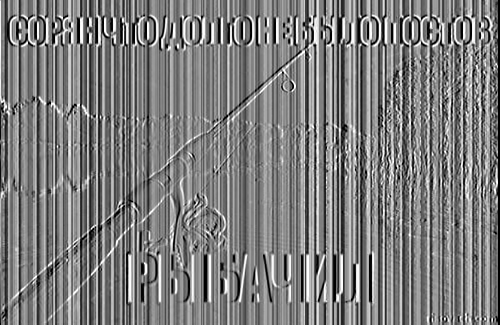

In [108]:
display_image(img_grad_x)

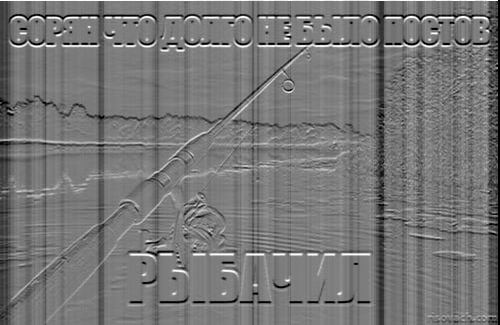

In [109]:
display_image(img_grad_y)

In [126]:
img_grad = MinMaxScaler(np.sqrt(convolve2D(img_gs, Gx, 1, 1) ** 2 + convolve2D(img_gs, Gy, 1, 1) ** 2)).astype(np.uint8)

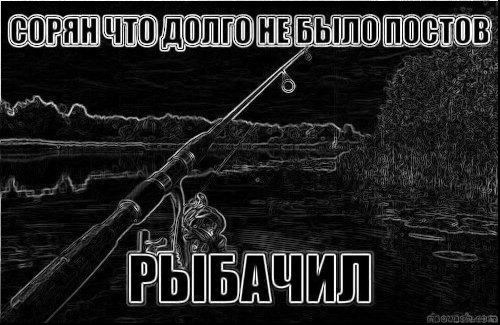

In [127]:
display_image(img_grad)

In [130]:
save_image('output/grayscale.png', img_gs)
save_image('output/Gx.png', img_grad_x)
save_image('output/Gy.png', img_grad_y)
save_image('output/G.png', img_grad)